## **Establish connection with GitHub using SSH protocol.**

In [1]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# ssh keys were generated earlier. Private and Public keys are stored in 
# 'colabkey' and 'colabkey.pub' files. Additionally a config file is also 
# stored in /content/drive/MyDrive/ssh_keys/ on google drive.

# Remove ssh folder and its contents if already present
!rm -rf /root/.ssh

# Create a directory
!mkdir /root/.ssh

# Copy everything (ssh_key files & config file) from google drive to Virtual Machine.  
!cp /content/drive/MyDrive/ssh_keys/* /root/.ssh

# Set permission
!chmod 700 /root/.ssh  

In [3]:
# Add the git server as an ssh known host
!touch /root/.ssh/known_hosts

# Trust github  
!ssh-keyscan github.com >> /root/.ssh/known_hosts

# Set permission  
!chmod 644 /root/.ssh/known_hosts  

# github.com:22 SSH-2.0-babeld-30fa67d5
# github.com:22 SSH-2.0-babeld-30fa67d5
# github.com:22 SSH-2.0-babeld-30fa67d5
# github.com:22 SSH-2.0-babeld-30fa67d5
# github.com:22 SSH-2.0-babeld-30fa67d5


In [4]:
# Run ssh-agent and add `ssh-add /root/.ssh/colabkey` in the prompt. 
# After this command, optinally check if the key is saved using `ssh-add -l`, 
# then exit the prompt.
!ssh-agent /bin/bash

bash: cannot set terminal process group (1129): Inappropriate ioctl for device
bash: no job control in this shell
/content# ssh-add /root/.ssh/colabkey
Identity added: /root/.ssh/colabkey (shreyasdb99@gmail.com)
/content# exit
exit


In [5]:
# Check connection with github
!ssh -T git@github.com

Hi shre-db! You've successfully authenticated, but GitHub does not provide shell access.


In [6]:
# Navigate to the project folder  # Please note that you need to remove this line of comment while running the cd command below.
cd drive/MyDrive/ColabProjects/EMNIST-CNN

/content/drive/MyDrive/ColabProjects/EMNIST-CNN


In [7]:
!ls

emnist	models	notebook.ipynb	README.md


## **Initialize git repository if not already**

In [ ]:
# # Initialize the directory as a git repository (if not already)
# !git init

Initialized empty Git repository in /content/drive/MyDrive/ColabProjects/EMNIST-CNN/.git/


In [ ]:
# # Configure user name and email (if not already)
# !git config user.name "shre-db"
# !git config user.email "shreyasdb99@gmail.com"

In [ ]:
# # Check Staging Area
# !git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	notebook.ipynb

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
# # Add Commit and Push
# !echo "# EMNIST-CNN" >> README.md
# !git add README.md notebook.ipynb
# !git commit -m "Add README and notebook" -m "This commit includes a README file and a notebook containing code for preliminary setup."
# !git branch -M main
# !git remote add origin git@github.com:shre-db/EMNIST-CNN.git
# !git push -u origin main

[master (root-commit) eaebfe4] Add README and notebook
 2 files changed, 2 insertions(+)
 create mode 100644 README.md
 create mode 100644 notebook.ipynb
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (4/4), 3.31 KiB | 565.00 KiB/s, done.
Total 4 (delta 0), reused 0 (delta 0)
To github.com:shre-db/EMNIST-CNN.git
 * [new branch]      main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.


## **Use cells in this section to execute commands**

In [34]:
!git status

Refresh index: 100% (2/2), done.
On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   notebook.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	emnist/
	models/

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git add notebook.ipynb
!git commit -m " " -m " "
!git push

[main 4927e5b] Experiment
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite A_Curious_FFN.ipynb (93%)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 173.35 KiB | 7.54 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0)
To github.com:shre-db/A-Curious-FFN.git
   76059ea..4927e5b  main -> main


----------------------

## **Working with Data**

In [8]:
# Import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

import copy
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import torchvision

import matplotlib.pyplot as plt

In [9]:
# Use GPU if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [10]:
# Download the data
emnist = torchvision.datasets.EMNIST(root='emnist', split='letters', download=True)

In [11]:
# Inspect the data
print(f"Classes: {emnist.classes}")
print(f"{len(emnist.classes)} Classes")

print('\nShape of the data:')
print(emnist.data.shape)

Classes: ['N/A', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
27 Classes

Shape of the data:
torch.Size([124800, 28, 28])


The EMNIST dataset has 124800 images of shape 28x28 pixels. This needs to be transformed to 4D tensor of dimensions `[num of images, channels, width, height]` for the convolution layers. The resulting 4D tensor should be of float type.

In [12]:
images = emnist.data.view([124800, 1, 28, 28]).float()
print('Tensor shape')
print(images.shape)

Tensor shape
torch.Size([124800, 1, 28, 28])


In [13]:
emnist.class_to_idx

{'N/A': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [14]:
for i in range(len(emnist.classes)):
  print(torch.sum(emnist.targets==i))

tensor(0)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)
tensor(4800)


Class N/A doesn't exist in the data

In [15]:
# Eliminate the N/A and subtract 1 from the original

# remove the first category
categories = emnist.classes[1:]

# reassign labels to start at 0
labels = copy.deepcopy(emnist.targets)-1
print(labels.shape)

print(torch.sum(labels == 0))
torch.unique(labels)

torch.Size([124800])
tensor(4800)


tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25])

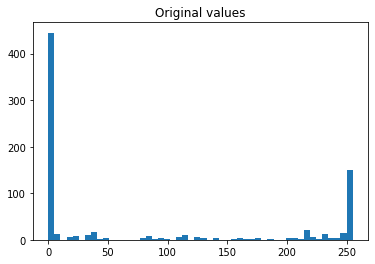

min 0.0
max 255.0


In [16]:
sample_image = images[0,:,:,:].view(1, -1).detach()
plt.hist(sample_image, bins=50)
plt.title('Original values')
plt.show()
print(f"min {torch.min(sample_image)}")
print(f"max {torch.max(sample_image)}")

Scale the images down to a range of 0 - 1 using min-max scaler or manually.

In [17]:
images /= torch.max(images)

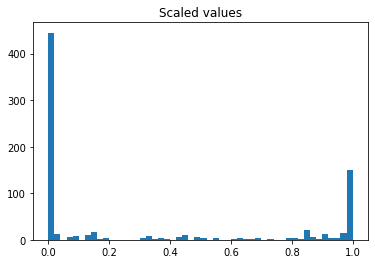

min 0.0
max 1.0


In [18]:
sample_image = images[0,:,:,:].view(1, -1).detach()
plt.hist(sample_image, bins=50)
plt.title('Scaled values')
plt.show()
print(f"min {torch.min(sample_image)}")
print(f"max {torch.max(sample_image)}")

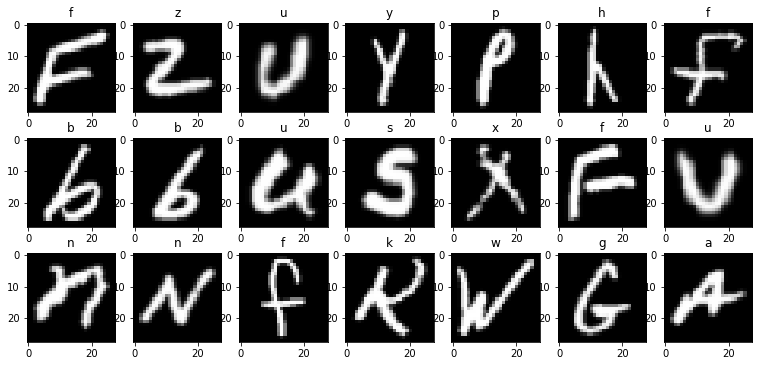

In [19]:
# Visualize a few images
fig, ax = plt.subplots(3, 7, figsize=(13,6))

for i, ax in enumerate(ax.flatten()):

  # randomly select an index to pick an image
  img_idx = np.random.randint(images.shape[0])

  # Pick the image and its target
  img = np.squeeze(images[img_idx,:,:])
  img_targ = categories[labels[img_idx]]

  ax.imshow(img.T, cmap='gray')
  ax.set_title(f'{img_targ}')

plt.show()

In [20]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

# Convert to pytorch Datasets
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

# Translate into Dataloader objects
batchsize=32
train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [21]:
# Check size. It should be [images, channels, width, height]
print(train_loader.dataset.tensors[0].shape)
print(train_loader.dataset.tensors[1].shape)

torch.Size([112320, 1, 28, 28])
torch.Size([112320])


**Padding and Stride on image size.**

<br>

$N_h = $ $\Large ⌊ \frac{(M_h + 2p - k)}{S_h} ⌋ \small + 1$

$N_w = $ $\Large ⌊ \frac{(M_w + 2p - k)}{S_w} ⌋ \small + 1$

where,

- $h, w$ - height, width
- $N$ - number of pixels in current layer
- $M$ - number of pixels in previous layer
- $p$ - padding
- $k$ - number of pixels in kernel (height or width for square kernels)
- $S$ - stride

In [22]:
# Create a DL model
def createNet(print_statements=False):

  class EMNISTNet(nn.Module):

    def __init__(self, print_statements):
      super().__init__()
      self.print_statements = print_statements

      # ---------------- Feature map layers ---------------- #

      # First convolution layer
      self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1)
      self.bnorm1 = nn.BatchNorm2d(64) # Input the number of channels (64) in this layer.
      # Output size after pooling: np.floor((28+2*1-3)/1)+1 = 28/2 = 14 (divide by 2 because we're maxpooling)

      # Second convolution layer
      self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0)
      self.bnorm2 = nn.BatchNorm2d(128) # 128 channels in this layer.
      # Output size after pooling: np.floor((14+2*0-3)/1)+1 = 12/2 = 6 

      # Third convolution layer
      self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=0)
      self.bnorm3 = nn.BatchNorm2d(256) # 256 channels in this layer.
      # Output size after pooling: np.floor((6+2*0-3)/1)+1 = 4/2 = 2

      # Compute the number of units in fully connected layers (=number of outputs of conv3)
      inp_size = np.floor((2+2*0-1)/1)+1 # because fc1 layer has no padding or kernel.
      inp_size = 256*int(inp_size**2) # 256*2*2 = 1024

      # ---------------- Linear decision layers ---------------- #

      self.fc1 = nn.Linear(inp_size, 256)
      self.fc2 = nn.Linear(256, 64)
      self.fc3 = nn.Linear(64, 26) # There are 26 classes in the dataset.

    def forward(self, X):
      if self.print_statements: print(f"Input: {list(X.shape)}")

      # first block: convolution -> maxpool -> batchnorm -> relu -> dropout
      X = F.max_pool2d(self.conv1(X), 2)
      X = F.leaky_relu(self.bnorm1(X))
      X = F.dropout(X, p=0.25, training=self.training)
      if self.print_statements: print(f"First block: {list(X.shape)}")

      # second block: convolution -> maxpool -> batchnorm -> relu -> dropout
      X = F.max_pool2d(self.conv2(X), 2)
      X = F.leaky_relu(self.bnorm2(X))
      X = F.dropout(X, p=0.25, training=self.training)
      if self.print_statements: print(f"Second block: {list(X.shape)}")

      # third block: convolution -> maxpool -> batchnorm -> relu -> dropout
      X = F.max_pool2d(self.conv3(X), 2)
      X = F.leaky_relu(self.bnorm3(X))
      X = F.dropout(X, p=0.25, training=self.training)
      if self.print_statements: print(f"Third block: {list(X.shape)}")

      # reshape for linear layers
      nUnits = X.shape.numel()/X.shape[0]
      X = X.view(-1, int(nUnits))
      if self.print_statements: print(f'vectorized: {list(X.shape)}')

      # Linear layers
      X = F.leaky_relu(self.fc1(X))
      X = F.dropout(X, p=0.5, training=self.training)
      X = F.leaky_relu(self.fc2(X))
      X = F.dropout(X, p=0.5, training=self.training)
      X = self.fc3(X)
      if self.print_statements: print(f'Final Output: {list(X.shape)}')

      return X

  # Create the model instance
  net = EMNISTNet(print_statements)

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

  return net, lossfun, optimizer


In [23]:
# test the model with one batch
net, lossfun, optimizer = createNet(True)

X, y = next(iter(train_loader))
yHat = net(X)

# check size of output
print('\Output size:')
print(yHat.shape)

# compute loss
loss = lossfun(yHat, torch.squeeze(y))
print('\nLoss: ')
print(loss)

Input: [32, 1, 28, 28]
First block: [32, 64, 14, 14]
Second block: [32, 128, 6, 6]
Third block: [32, 256, 2, 2]
vectorized: [32, 1024]
Final Output: [32, 26]
\Output size:
torch.Size([32, 26])

Loss: 
tensor(3.2730, grad_fn=<NllLossBackward0>)


In [24]:
# Function to train the model
def trainTheModel():
  # number of epochs
  numepochs = 10

  # create a new model
  net, lossfun, optimizer = createNet()

  # Send the model to the GPU
  net.to(device)

  # initialize Losses
  trainLoss = torch.zeros(numepochs)
  testLoss = torch.zeros(numepochs)
  trainAcc = torch.zeros(numepochs)
  testAcc = torch.zeros(numepochs)

  # Loop over the epochs
  for epoch in range(numepochs):

    # Loop over training data batches
    net.train()
    batchLoss = []
    batchAcc = []
    for X,y in train_loader:

      # Push the data to GPU
      X = X.to(device)
      y = y.to(device)

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat, y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # Loss and error from this batch
      batchLoss.append(loss.item())
      batchAcc.append(torch.mean((torch.argmax(yHat, axis=1) == y).float()).item())
    # end of batch loop...

    # get the average losses and error rates across the batches
    trainLoss[epoch] = np.mean(batchLoss)
    trainAcc[epoch] = 100*np.mean(batchAcc)

    # test performance
    net.eval()
    X, y = next(iter(test_loader)) # extract X, y from dataloader

    # push data to GPU
    X = X.to(device)
    y = y.to(device)

    with torch.no_grad(): # deactivates autograd
      yHat = net(X)
      loss = lossfun(yHat, y)

    # get loss and error rate from the test batch
    testLoss[epoch] = loss.item()
    testAcc[epoch] = 100*torch.mean((torch.argmax(yHat, axis=1) == y).float()).item()
  # end epochs

  # function output
  return trainLoss, testLoss, trainAcc, testAcc, net

In [25]:
trainLoss, testLoss, trainAcc, testAcc, net = trainTheModel()

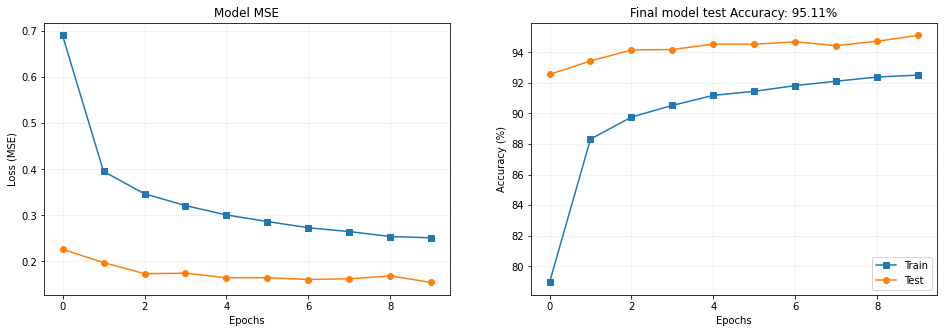

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(trainLoss, 's-', label='Train')
ax[0].plot(testLoss, 'o-', label='Test')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss (MSE)')
ax[0].set_title('Model MSE')
ax[0].grid(alpha=0.2)

ax[1].plot(trainAcc, 's-', label='Train')
ax[1].plot(testAcc, 'o-', label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title(f'Final model test Accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()
ax[1].grid(alpha=0.2)

plt.show()

In [30]:
# Save the model
torch.save(net.state_dict(), 'models/EMNISTNet.pt')